<a href="https://colab.research.google.com/github/anchalchepurwar/ML_pr/blob/main/ML_PR3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving customer_churn.csv to customer_churn.csv


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

df = pd.read_csv('customer_churn.csv')
print(df.head())
print(df.isnull().sum())
print(df.describe())

              Names   Age  Total_Purchase  Account_Manager  Years  Num_Sites  \
0  Cameron Williams  42.0        11066.80                0   7.22        8.0   
1     Kevin Mueller  41.0        11916.22                0   6.50       11.0   
2       Eric Lozano  38.0        12884.75                0   6.67       12.0   
3     Phillip White  42.0         8010.76                0   6.71       10.0   
4    Cynthia Norton  37.0         9191.58                0   5.56        9.0   

          Onboard_date                                           Location  \
0  2013-08-30 07:00:40      10265 Elizabeth Mission Barkerburgh, AK 89518   
1  2013-08-13 00:38:46  6157 Frank Gardens Suite 019 Carloshaven, RI 1...   
2  2016-06-29 06:20:07             1331 Keith Court Alyssahaven, DE 90114   
3  2014-04-22 12:43:12       13120 Daniel Mount Angelabury, WY 30645-4695   
4  2016-01-19 15:31:15                765 Tricia Row Karenshire, MH 71730   

                       Company  Churn  
0               

In [ ]:
df = df.drop(['Names', 'Onboard_date', 'Location', 'Company'], axis=1)
df = pd.get_dummies(df, drop_first=True)
X = df.drop('Churn', axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
y_pred_proba_log_reg = log_reg.predict_proba(X_test)[:, 1]


In [ ]:
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
y_pred_proba_rf = rf_clf.predict_proba(X_test)[:, 1]

Logistic Regression Accuracy: 0.9
Logistic Regression Precision: 0.7692307692307693
Logistic Regression Recall: 0.625
Logistic Regression F1-Score: 0.6896551724137931
Logistic Regression ROC-AUC: 0.8980152027027026


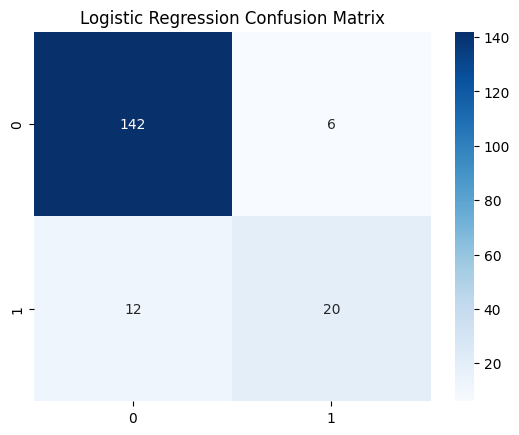

In [ ]:
# Accuracy
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f'Logistic Regression Accuracy: {accuracy_log_reg}')

# Precision
precision_log_reg = precision_score(y_test, y_pred_log_reg)
print(f'Logistic Regression Precision: {precision_log_reg}')

# Recall
recall_log_reg = recall_score(y_test, y_pred_log_reg)
print(f'Logistic Regression Recall: {recall_log_reg}')

# F1-Score
f1_log_reg = f1_score(y_test, y_pred_log_reg)
print(f'Logistic Regression F1-Score: {f1_log_reg}')

# ROC-AUC
roc_auc_log_reg = roc_auc_score(y_test, y_pred_proba_log_reg)
print(f'Logistic Regression ROC-AUC: {roc_auc_log_reg}')

# Confusion Matrix
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
sns.heatmap(conf_matrix_log_reg, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

Random Forest Accuracy: 0.8722222222222222
Random Forest Precision: 0.7368421052631579
Random Forest Recall: 0.4375
Random Forest F1-Score: 0.5490196078431373
Random Forest ROC-AUC: 0.8766891891891893


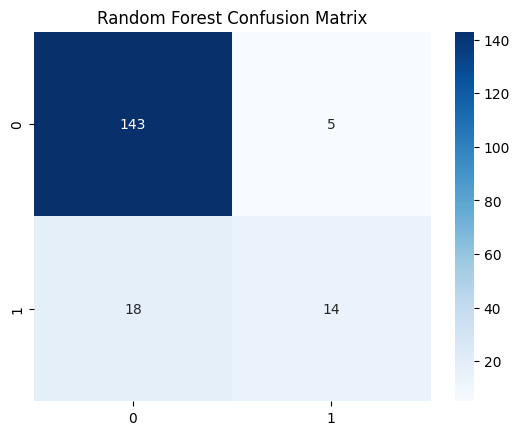

In [ ]:
# Accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf}')

# Precision
precision_rf = precision_score(y_test, y_pred_rf)
print(f'Random Forest Precision: {precision_rf}')

# Recall
recall_rf = recall_score(y_test, y_pred_rf)
print(f'Random Forest Recall: {recall_rf}')

# F1-Score
f1_rf = f1_score(y_test, y_pred_rf)
print(f'Random Forest F1-Score: {f1_rf}')

# ROC-AUC
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
print(f'Random Forest ROC-AUC: {roc_auc_rf}')

# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

# Initialize the model
lin_reg = LinearRegression()

# Train the model
lin_reg.fit(X_train, y_train)

# Predict on the test set
y_pred_lin_reg = lin_reg.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred_lin_reg)
mse = mean_squared_error(y_test, y_pred_lin_reg)
rmse = np.sqrt(mse)

print(f'Linear Regression MAE: {mae}')
print(f'Linear Regression MSE: {mse}')
print(f'Linear Regression RMSE: {rmse}')

Linear Regression MAE: 0.24001868694894443
Linear Regression MSE: 0.10061773708756752
Linear Regression RMSE: 0.31720299035092264


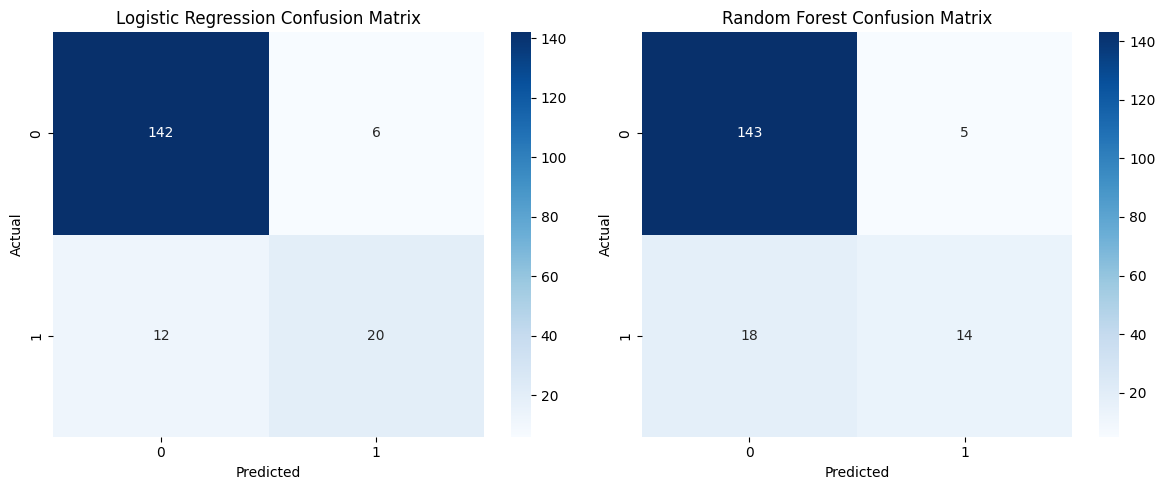

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion matrix for Logistic Regression
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)

# Confusion matrix for Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot Logistic Regression Confusion Matrix
sns.heatmap(conf_matrix_log_reg, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Logistic Regression Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Plot Random Forest Confusion Matrix
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Random Forest Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

# Display the plots
plt.tight_layout()
plt.show()

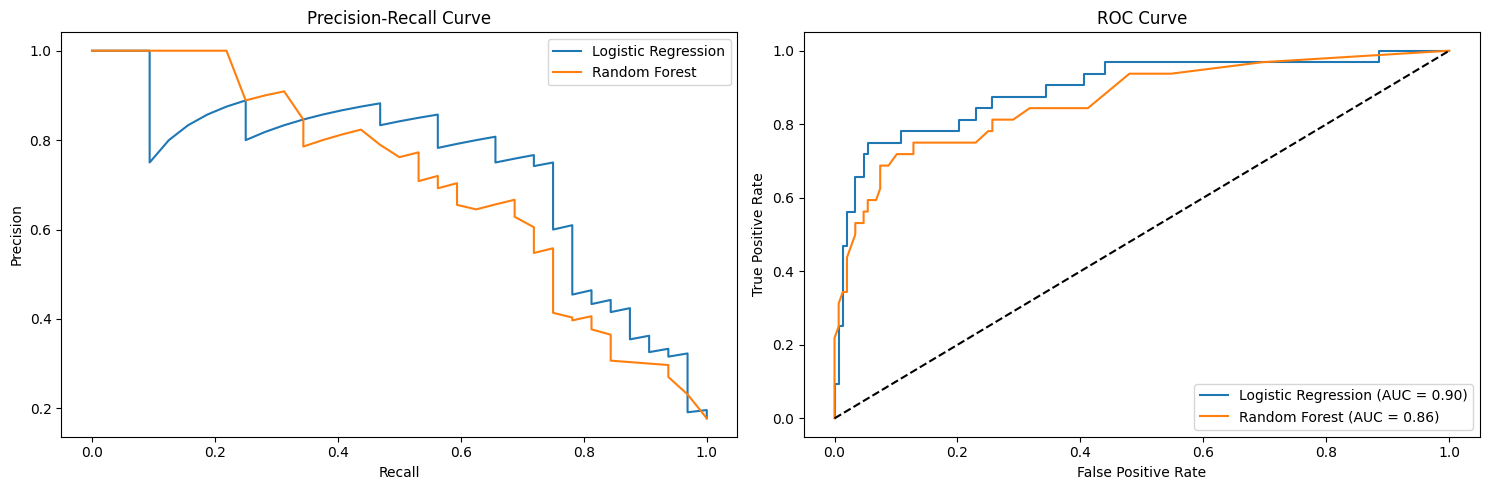

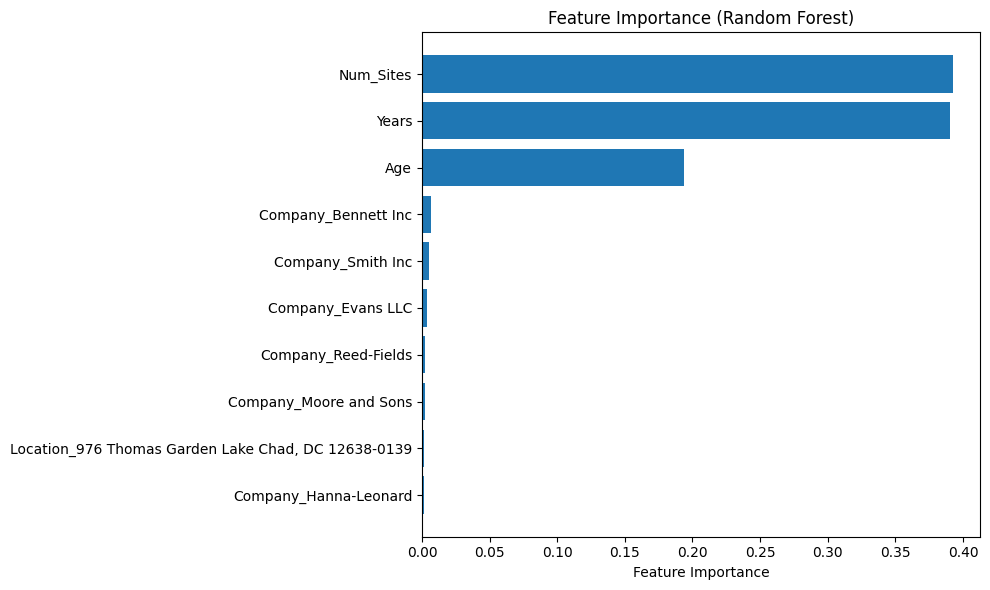

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve, roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_classif

# Step 1: Load and Preprocess Data
def load_and_preprocess_data(file_path):
    # Load the data
    df = pd.read_csv(file_path)

    # Drop non-predictive columns
    df = df.drop(['Names'], axis=1)

    # Handle missing values
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

    # Convert categorical variables to numeric
    categorical_columns = df.select_dtypes(include=['object']).columns
    df = pd.get_dummies(df, columns=categorical_columns)

    return df

# Step 2: Feature Scaling and Selection
def prepare_features(X, y, n_features=10):
    # Scale features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Select top features
    selector = SelectKBest(score_func=f_classif, k=n_features)
    X_selected = selector.fit_transform(X_scaled, y)

    # Get selected feature names
    selected_features = X.columns[selector.get_support()].tolist()

    return X_scaled, X_selected, selected_features

# Step 3: Model Training and Evaluation
def train_and_evaluate_models(X, y):
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize models
    models = {
        'Logistic Regression': LogisticRegression(random_state=42),
        'Random Forest': RandomForestClassifier(random_state=42)
    }

    results = {}

    for name, model in models.items():
        # Train model
        model.fit(X_train, y_train)

        # Predictions
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]

        # Calculate curves
        precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

        results[name] = {
            'y_test': y_test,
            'y_pred': y_pred,
            'y_pred_proba': y_pred_proba,
            'precision': precision,
            'recall': recall,
            'fpr': fpr,
            'tpr': tpr,
            'roc_auc': auc(fpr, tpr)
        }

    return results

# Step 4: Visualization Functions
def plot_evaluation_curves(results):
    plt.figure(figsize=(15, 5))

    # Precision-Recall Curve
    plt.subplot(1, 2, 1)
    for name, result in results.items():
        plt.plot(result['recall'], result['precision'], label=f'{name}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()

    # ROC Curve
    plt.subplot(1, 2, 2)
    for name, result in results.items():
        plt.plot(result['fpr'], result['tpr'],
                label=f'{name} (AUC = {result["roc_auc"]:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()

    plt.tight_layout()
    return plt.gcf()

def plot_feature_importance(X, y, selected_features):
    # Train Random Forest for feature importance
    rf = RandomForestClassifier(random_state=42)
    rf.fit(X, y)

    # Plot feature importance
    plt.figure(figsize=(10, 6))
    importance_df = pd.DataFrame({
        'feature': selected_features,
        'importance': rf.feature_importances_
    }).sort_values('importance', ascending=True)

    plt.barh(importance_df['feature'], importance_df['importance'])
    plt.xlabel('Feature Importance')
    plt.title('Feature Importance (Random Forest)')
    plt.tight_layout()
    return plt.gcf()

# Main execution
def main():
    # Load and preprocess data
    df = load_and_preprocess_data('customer_churn.csv')

    # Separate features and target
    X = df.drop('Churn', axis=1)
    y = df['Churn']

    # Prepare features
    X_scaled, X_selected, selected_features = prepare_features(X, y)

    # Train and evaluate models
    results = train_and_evaluate_models(X_selected, y)

    # Create visualizations
    eval_curves = plot_evaluation_curves(results)
    feature_imp = plot_feature_importance(X_selected, y, selected_features)

    return results, selected_features

# Run analysis
results, selected_features = main()